In [1]:
import numpy as np

class Tax:

    def __init__(self, revenue_input, costs_input):
        self.revenue, self.costs, self.brackets, self.percent = revenue_input, costs_input, np.array([0,1,2,5]), np.array([0.1,0.15,0.2,0.25])

    def set_revenue(self, revenue_input):
        self.revenue = revenue_input

    def set_costs(self, costs_input):
        self.costs = costs_input

    def set_brackets(self, brackets_input):
        self.brackets = brackets_input

    def set_percent(self, percent_input):
        self.percent = percent_input

    def compute_income(self):
        return self.revenue-self.costs

    def compute_tax(self):
        self.income = self.compute_income()
        if self.income <= 0:
            return 0
        self.lower_brackets = self.brackets[self.brackets < self.income]
        self.lower_percent = self.percent[self.brackets < self.income]
        self.tax = np.dot(np.diff(self.lower_brackets),self.lower_percent[:-1])
        self.tax = self.tax + self.lower_percent[-1]*(self.income-self.lower_brackets[-1])
        return self.tax

    def compute_average_tax_rate(self):
        return self.compute_tax()/self.income

Firm_1 = Tax(10,0)
print('Income:', Firm_1.compute_income(), 'Million')
print('Tax:', Firm_1.compute_tax(), 'Million')
print('Rate:', Firm_1.compute_average_tax_rate()*100, 'Percent')
print()

Firm_2 = Tax(3,0)
print('Income:', Firm_2.compute_income(), 'Million')
print('Tax:', Firm_2.compute_tax(), 'Million')
print('Rate:', Firm_2.compute_average_tax_rate()*100, 'Percent')

Income: 10 Million
Tax: 2.1 Million
Rate: 21.0 Percent

Income: 3 Million
Tax: 0.45 Million
Rate: 15.0 Percent


In [3]:
import random
import numpy as np

class Roulette: # For simplicity, the roulette version with only a single 0 is implemented

    house_earnings = 0

    def __init__(self, stash_input):
        self.stash = stash_input

    def check_stash(self):
        print('Current stash:', self.stash)

    def check_house_earnings(self):
        print('House earnings:', Roulette.house_earnings)

    def roll(self):
        self.bet_type = input('If straight up, just input the number between 0 and 36. O for odd, E for even. Choose bet type: ')
        self.bet_type = self.convert_bet_type()
        try:
            self.bet_type = int(self.bet_type)
        except ValueError:
            print('Invalid bet type!')
            return

        self.bet = input('Choose bet amount: ')
        try:
            self.bet = float(self.bet)
        except ValueError:
            print('Invalid bet value!')
            return

        if self.bet < 0:
            print('Invalid negative bet!')
            self.check_stash()
            return
        if self.bet > self.stash:
            print('Out of money!')
            self.check_stash()
            return

        self.result = random.randint(0,36)
        print('You rolled', self.result)

        if self.bet_type == 37:
            if np.mod(self.result,2) == 1:
                print('You win!')
                self.stash += self.bet
            else:
                print('You lose =(')
                self.stash -= self.bet
            self.check_stash()
            return

        if self.bet_type == 38:
            if np.mod(self.result,2) == 0 and self.result > 0:
                print('You win!')
                self.stash += self.bet
                Roulette.house_earnings -= self.bet
            else:
                print('You lose =(')
                self.stash -= self.bet
                Roulette.house_earnings += self.bet
            self.check_stash()
            return

        if self.result == self.bet_type:
            print('You win!')
            self.stash += self.bet*36
            Roulette.house_earnings -= self.bet*36
        else:
            print('You lose =(')
            self.stash -= self.bet
            Roulette.house_earnings += self.bet
        self.check_stash()

    def add_money(self, money):
        self.stash += money
        self.check_stash()

    def convert_bet_type(self):
        return {'O':37,'o':37,'E':38,'e':38}.get(self.bet_type,self.bet_type) # Default value is the original input

Player_1 = Roulette(100)
Player_1.roll()

Player_2 = Roulette(200)
Player_2.roll()

If straight up, just input the number between 0 and 36. O for odd, E for even. Choose bet type: 3
Choose bet amount: #$
Invalid bet value!
If straight up, just input the number between 0 and 36. O for odd, E for even. Choose bet type: dfds
Invalid bet type!


In [6]:
print(Player_1.check_house_earnings())
print(Player_2.check_house_earnings())
print(Roulette.house_earnings)

House earnings: 150.0
None
House earnings: 150.0
None
150.0


262


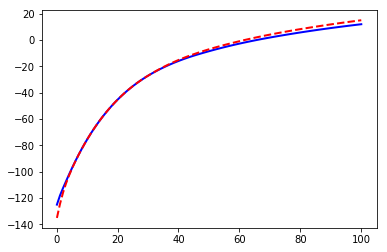

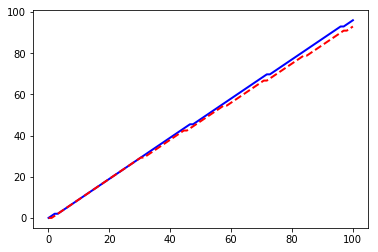

Time elapsed:  2.6330056190490723


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import time

start = time.time()

beta = 0.95
num_w = 100
num_e = 2
tol = 10**(-5)

w_vec = np.linspace(0.1,100,num_w)
e_vec = np.array([1,2])
e_trans = np.array([[0.9,0.1],[0.4,0.6]])

wprime = w_vec-0.005
value_old = np.ones([num_w,num_e])
value_new = np.zeros([num_w,num_e])
policy = np.zeros([num_w,num_e])
ctr = 0

while(np.max(np.abs(value_old-value_new)) > tol):
    np.copyto(value_old,value_new)
    for e_curr in np.arange(num_e):
        for w_curr in np.arange(num_w):
            length_temp = np.sum(wprime<=w_vec[w_curr])
            value_expected = np.sum(np.kron(e_trans[e_curr,:],np.ones([length_temp,1]))*value_old[wprime<=w_vec[w_curr],:],axis=1)
            value_new[w_curr,e_curr] = np.max(e_vec[e_curr]*np.log(w_vec[w_curr]-wprime[wprime<=w_vec[w_curr]])+beta*value_expected)
            policy[w_curr,e_curr] = np.argmax(e_vec[e_curr]*np.log(w_vec[w_curr]-wprime[wprime<=w_vec[w_curr]])+beta*value_expected)
    ctr = ctr+1

policy = policy.astype(int)

print(ctr)

plt.plot(w_vec, value_new[:,0], 'b', w_vec, value_new[:,1], 'r--', linewidth=2)
plt.show()

plt.plot(w_vec, w_vec[policy[:,0]], 'b', w_vec, w_vec[policy[:,1]], 'r--', linewidth=2)
plt.show()

end = time.time()
print('Time elapsed: ', end-start)